In [ ]:
# # colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/(최종)통합데이터.csv",encoding='cp949')
df.head()

In [ ]:
use_df = df[['역사명','일평균승하차(명)','1인 가구수(세대)','사업체수','일평균(원)']]
use_df.head()

In [ ]:
use_df = use_df.set_index(use_df["역사명"])

In [ ]:
use_df.drop(columns="역사명", inplace=True)

# k-medoids

In [ ]:
# !pip install scikit-learn-extra


In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, max_iter=30,random_state=42).fit(use_df)
kmedoids.labels_

array([2, 2, 2, 1, 1, 3, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 1, 3, 3, 1, 1, 0, 3, 1, 2, 2,
       2, 3, 2, 3, 2, 3, 1, 2, 3, 2, 1, 0, 3, 2, 0, 2, 0, 2, 3, 0, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 2, 0, 3, 0, 0])

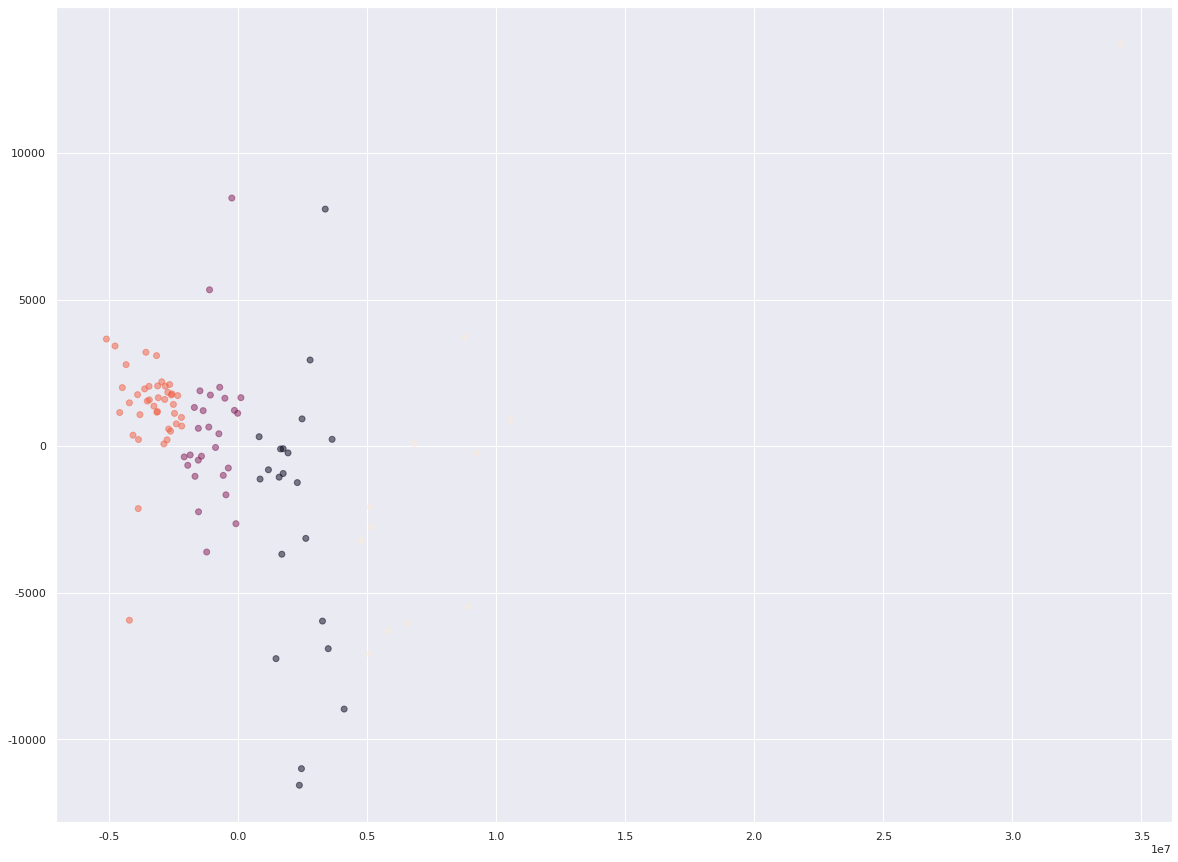

In [ ]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(20,15))
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca.fit(use_df)
pca_data = pca.transform(use_df)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.99999363e-01, 5.38385521e-07])

In [ ]:
sum(pca.explained_variance_ratio_)

0.999999900926865

pca에서 위와 같은 코드로 간단하게 내가 설정한 주성분의 개수(n_components)로 전체 데이터의 분산을 얼마만큼 설명 가능한지 알 수 있다.

본 데이터의 경우 두 개의 주성분이 전체 분산의 약 99%를 설명한다. 